## ProblemStatment : 1


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [61]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import sklearn.tree as tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.feature_selection import RFE

In [9]:
data_df = pd.read_csv('Company_Data.csv')
data_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
report = pp.ProfileReport(data_df)
report.to_widgets()

In [10]:
#As described in problem statment we will first convert target variable Sale to categorical variable.As targetVar is continuos and we 
#need to convert to categorical so we use cut func where it will calculate the mean of that col and construct bins as defined
n_bins=2
label_encoder = LabelEncoder()
data_df['Sales_Label'] = label_encoder.fit_transform(pd.cut(data_df.Sales, n_bins, retbins=True)[0])

# data_df = pd.get_dummies(data_df) or
data_df['ShelveLoc_label'] = label_encoder.fit_transform(data_df['ShelveLoc'])
data_df['Urban_label'] = label_encoder.fit_transform(data_df['Urban'])
data_df['US_label'] = label_encoder.fit_transform(data_df['US'])
data_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Label,ShelveLoc_label,Urban_label,US_label
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1,0,1,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,1,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1,2,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,2,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,0,1,0


In [11]:
x = data_df.iloc[:,[1,2,3,4,5,7,8,12,13,14]]
y=data_df.iloc[:,11]

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sales            400 non-null    float64
 1   CompPrice        400 non-null    int64  
 2   Income           400 non-null    int64  
 3   Advertising      400 non-null    int64  
 4   Population       400 non-null    int64  
 5   Price            400 non-null    int64  
 6   ShelveLoc        400 non-null    object 
 7   Age              400 non-null    int64  
 8   Education        400 non-null    int64  
 9   Urban            400 non-null    object 
 10  US               400 non-null    object 
 11  Sales_Label      400 non-null    int32  
 12  ShelveLoc_label  400 non-null    int32  
 13  Urban_label      400 non-null    int32  
 14  US_label         400 non-null    int32  
dtypes: float64(1), int32(4), int64(7), object(3)
memory usage: 40.8+ KB


In [13]:
#Feature Selection Model Validation
model =DecisionTreeClassifier(criterion='entropy')# as the dependent var is categorical so we can use either c5.0(entropy) or CART(gini impurities)
model.fit(x,y)
rfe = RFE(model)
rfe.fit(x,y)
print("Decession Tree Feature selection \n",model.feature_importances_)
print("Recursive Feature Selection Ranking ", rfe.ranking_,"\n Recursive Feature Selection Top Features ",rfe.support_)
#results = cross_val_score(model,x,y,cv = loocv)
#results

Decession Tree Feature selection 
 [0.14631624 0.09130963 0.10597315 0.03130438 0.27404839 0.12396726
 0.         0.15553983 0.0324621  0.03907901]
Recursive Feature Selection Ranking  [1 2 1 5 1 1 6 1 4 3] 
 Recursive Feature Selection Top Features  [ True False  True False  True  True False  True False False]


In [16]:
rfe.n_features_in_#ip features

10

In [15]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_label', 'Urban_label', 'US_label'],
      dtype='object')

In [26]:
#From the above feature selection method we can select top 5 features for getting the best fit model(which are dependent to predict y vriable)
#x
featured_x = x.iloc[:,[0,1,2,4,5,7]]
featured_x

,CompPrice,Income,Advertising,Price,Age,ShelveLoc_label
0,138,73,11,120,42,0
1,111,48,16,83,65,1
2,113,35,10,80,59,2
3,117,100,4,97,55,2
4,141,64,3,128,38,0
...,...,...,...,...,...,...
395,138,108,17,128,33,1
396,139,23,3,120,55,2
397,162,26,12,159,40,2
398,100,79,7,95,50,0


In [62]:
std_xValues = StandardScaler().fit_transform(featured_x.values)
modelBuilding = DecisionTreeClassifier(criterion='gini', max_depth=3)
loocv = LeaveOneOut()# we use this method for model validation as the data record count is small
modelBuilding.fit(std_xValues,y)

DecisionTreeClassifier(max_depth=3)

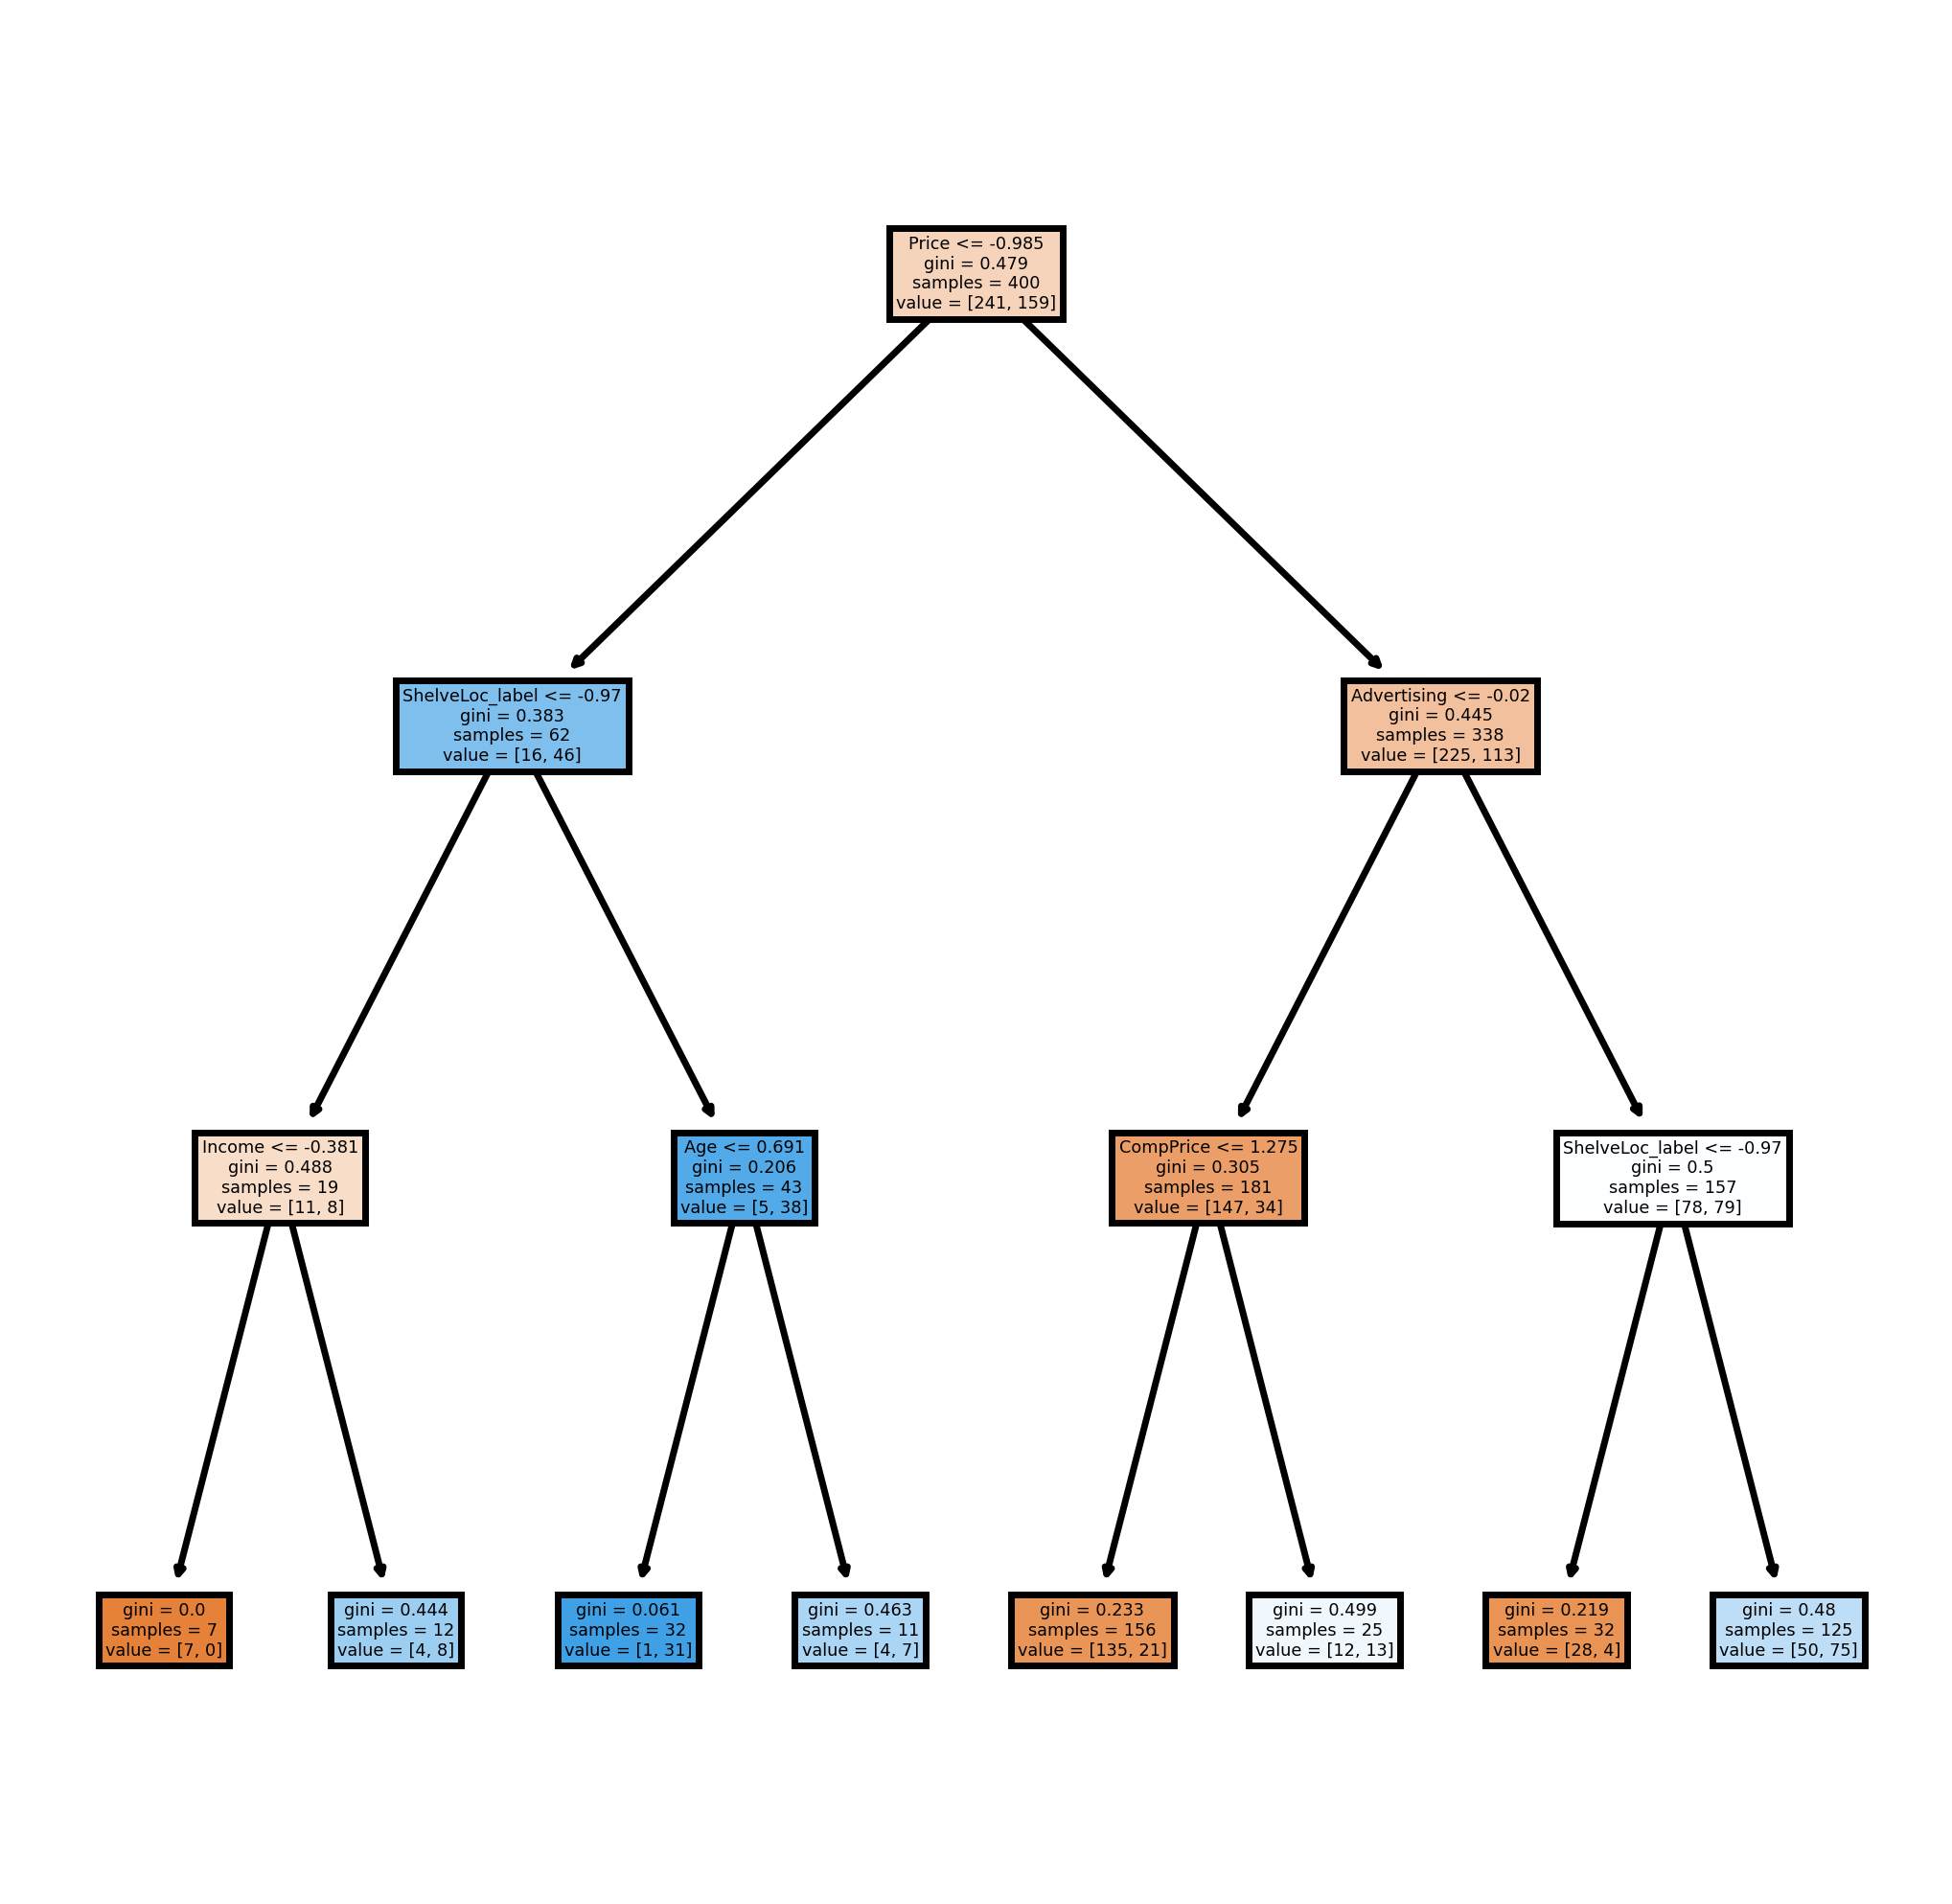

In [63]:
fig, axes = plt.subplots(figsize = (5,5), dpi=500)
tree.plot_tree(modelBuilding,feature_names=['CompPrice','Income','Advertising','Price','Age','ShelveLoc_label'], filled = True)
plt.show()

In [64]:
results = cross_val_score(modelBuilding, std_xValues, y, cv=loocv)
print("Mean---",results.mean(),"\n Std Deviation----",results.std())

Mean--- 0.7725 
 Std Deviation---- 0.4192180220362669


In [44]:
results

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y,results))
#Accuracy of the model is 41%

              precision    recall  f1-score   support

           0       0.54      0.20      0.30       241
           1       0.38      0.74      0.50       159

    accuracy                           0.41       400
   macro avg       0.46      0.47      0.40       400
weighted avg       0.47      0.41      0.38       400



In [59]:
y_predict = modelBuilding.predict(featured_x)
passedTest = data_df.iloc[np.where(y_predict==y)]
print("Total Test length is ",len(featured_x),"\n Passed Test count is",len(passedTest))

Total Test length is  400 
 Passed Test count is 304


In [60]:
failed = data_df.iloc[np.where(y_predict!=y)]
print("Total Test length is ",len(data_df),"\n Passed Test count is",len(failed))

Total Test length is  400 
 Passed Test count is 96
